<a href="https://colab.research.google.com/github/freevejarano/2-Proyecto-Covid-Colombia/blob/Mapa/Linear%20Regression%20Model%20in%20Scikit-Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b> Ciencias de la Computación e Inteligencia Artificial </b>
<br>
<i><b>Autor:</b></i> Luis Alejandro Vejarano Gutierrez 
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial
<br>
<i><b>TEMA:</b></i> Regresión Lineal: Modelo implementado en Scikit-Learn
<br>
12/05/21
<br>
</FONT>
</div>

# **REGRESIÓN LINEAL**

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza cuando la variable dependiente/objetivo ['target´] es del tipo continuo, es decir, numérico real. Establece la asosiación/relación entre la varaible dependiente *$y$* con una o más variables independientes $X$, a través de la línea de mejor ajuste. Funciona según el principio de los *mínimos cuadrados ordinarios (OLS)* / *error cuadrático medio (MSE)*. OLS es un método estadístico para estimar los parámetros desconocidos de la función de regresión lineal. El objetivo de OLS es minimizar la suma de la diferencia entre la variable dependiente observada en el conjunto de datos dao y los que han sido predecido por la regresión lineal (mejor ajuste).

# **REPRESENTACIÓN DE LA HIPÓTESIS**
$X_i$ para denotar la variable independiente

$y_i$ para denotar la varaible dependiente

Un para $(X_i,y_i)$ se llama muestra de entrenamiento.

El objetivo del aprendizaje supervisado es aprender una función de hipótesis **h**, para un conjunto de entrenamiento dado que puede utilizarse para estimar en base a $X$. La función de hipótesis se puede representar.

\begin{gather}
h\theta{X_i}=\theta0+\theta X_i
\end{gather}

donde $\theta0$, $\theta1$ son parámetros de hipótesis $\theta0$ representaría el parámetro de intersección con el eje $y$, $\theta1$ representaría el parámetro de la pendiente {el grado de inclinación de la línea recta}. 

Para la regresión lienal múltiple, sí hay más de una variable independiente, se usará $X_{ij}$ para denotar la variable independiente y $y_i$ para denotar la variable dependiente.

\begin{gather}
h\theta{(X_i)}=\theta_0+\theta_1 X_{i1}+\theta_2 X_{i2}+...+\theta_j X_{ij}+...+\theta_n X_{mn}
\end{gather}

$\theta_0$...$\theta_{n}$ son los parámetros de la hipótesis de muestras de entrenamiento, n es el número de variabels independientes.

**Construcción del Modelo**
Se construirá un modelo de regresión lineal para un dataset de los datos de vivienda en los surbios de Boston. El dataset consta de CRIM, ZN, INDUS, CHAS, NOX,RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT: son las variables independientes; y MEDV es la característica dependiente. Predecir el valor mediano de las casas ocupadas por el propietario.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfvalor = pd.read_csv('https://raw.githubusercontent.com/freevejarano/Regresion-Lineal_Real-Estate-DataSet/main/data.csv')
dfvalor.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dfvalor.shape

(511, 14)

Es primoridal eliminar los registros nulos para el correcto análisis y tratamiento de los datos

In [ ]:
dfvalor.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
dfvalor.RM.isnull().sum()

5

In [ ]:
dfvalor.drop(dfvalor[dfvalor.RM.isnull()].index, inplace = True)

In [ ]:
dfvalor.shape

(506, 14)

En el dataframe $m$ = 506 muestras y $n=14$ variables totales.

\begin{gather}
h\theta{(X_i)}=\theta_0+\theta_1 ZN +\theta_2 INDUS+\theta_3 CHAS+\theta_4 NOX+\theta_5 RM+\theta_6 AGE+\theta_7 DIS+\theta_8 RAD+\theta_9 TAX+\theta_10 PTRATIO+\theta_11 B+\theta_12 LSTAT+\theta_13 CRIM
\end{gather}

Si $i=1$

\begin{gather}
h\theta{(X_i)}=\theta_0+\theta_1 18.0+\theta_2 2.31 +\theta_4 0.538+\theta_5 6.575+\theta_6 65.2+\theta_7 4.0900+\theta_8 1+\theta_9 2.96+\theta_{10} 15.3+\theta_{11} 396.90+\theta_{12} 4.98+\theta_{13} 0.00632
\end{gather}

\begin{gather}
y_1 = 24.0
\end{gather}



# **FORMULACIÓN DE LA MATRIZ**

En general se puede escribir como un vector

\begin{gather}
X_{ij} = (X_{i1} X_{i2} X_{i3} . . . X_{in})
\end{gather}

Ahora se combinan todos los vectores individuales en una matriz de tamaño (m,n) y se denota como matriz de entrada $X$, que consiste en todas las muestras

\begin{gather}
X = 
\begin{pmatrix}
X_{11} & X_{12} & X_{13} &. &. &. & X_{1n} \\
X_{21} & X_{22} & X_{23} &. &. &. & X_{2n} \\
. & . & . &. &. &. & . \\
. & . & . &. &. &. & . \\
X_{m1} & X_{m2} & X_{m3} &. &. &. & X_{mn} \\
\end{pmatrix}
\end{gather}

Representar el parámetro como función y la variable dependiente en forma vectorial

\begin{gather}
\theta = 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
.\\ . \\
.\\ . \\
\theta_n \\
\end{pmatrix}_{(n+1,1)}
\hspace{1cm}
y = 
\begin{pmatrix}
y_0 \\
y_1 \\
.\\ . \\
.\\ . \\
y_m \\
\end{pmatrix}_{(m,1)}
\hspace{1.5cm}
\end{gather}

Se representará la función de hipótesis en forma vectorizada

\begin{gather}
h\theta(X) = X\theta
\end{gather}

# **FUNCIÓN DE COSTE**

Mide el grado de error del modelo en términos de capacidad para estimar la relación/asosiación entre $X$ y $y$. Se puede medir la precisión de la función de hipótesis. Toma la diferencia media de la variable dependiente observada en el conjunto de datos y la variable predicha por la función de hipótesis.

\begin{gather}
J(\theta) = \frac{1}{m}
\sum_{i=1}^{m}(\hat{y}_i-y_i)^2
\end{gather}

Cada una de las muestras de entrada son igualmente un vector de columnas $n+1$ y filas $X$

\begin{gather}
J(\theta) = \frac{1}{m}
(X\theta-y)^T(X\theta-y)
\end{gather}


El producto de las matrices retornará un vector de tamaño (m,1), de forma tal que retornaráo devolverá el tamaño del vector unitario. 


# **ECUACIÓN NORMAL**

Solución analítica al problema de regresión lineal con una función de coste *mínimo cuadrático ordinario*. Se quiere maximizar la función de coste, se toma la derivada parcial de $J(\theta)$ con respecto a $\theta$ y se iguala a 0. 

\begin{gather}
min_{\theta_0,\theta_1,...,\theta_n}J(\theta_0,\theta_1,...,\theta_n)
\end{gather}

\

\begin{gather}
\frac{\partial{J(\theta_j)}}{\partial\theta_j} = 0
\end{gather}

[Luego de las derivadas parciales sobre las ecuaciones anteriores...]

Quedando la ecauación normal de la regresión lineal

\begin{gather}
\theta = (X^TX)^{-1}X^Ty
\end{gather}

Se aplica la derivada parcial a la función de costes

\begin{gather}
\frac{\partial{J(\theta_j)}}{\partial\theta_j} =
\frac{\partial}{\partial\theta}
\frac{1}{m}(X\theta-y)^T(X\theta-y)
\end{gather}

Se desecha la parte $1/m$ para comparar con la derivada con 0. Seguidamente, se resuelve $J(\theta)$

## **ANÁLISIS EXPLORATORIO DE DATOS**

In [ ]:
# visualizar el resumen estadísitico del dataframe /// para las variables numéricas
dfvalor.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.617404,8.600123,0.00632,0.082268,0.266005,3.677082,88.9762
ZN,506.0,11.289526,23.325350,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,506.0,11.174842,6.824592,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.555209,0.115611,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.209000,6.629750,8.7800
AGE,506.0,68.555731,28.161573,2.90000,45.025000,77.500000,93.975000,100.0000
DIS,506.0,3.775231,2.096147,1.12960,2.098500,3.122200,5.117675,12.1265
RAD,506.0,9.531621,8.716661,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.330040,168.382685,187.00000,280.250000,330.000000,666.000000,711.0000


In [ ]:
### Nombre de las columnas
dfvalor.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Descripción de las variables

* **CRIM**: *Tasa de criminalidad per cápita del CRIM por ciudad.*
* **ZN**: Proporción ZN de terreno residencial zonitario para lotes de más de 25,000 pies cuadrados.
* **INDUS**: Proporción indus de acres de negocios no minoristas por ciudad.
* **CHAS**: Charles River variable ficticia (= 1 si el tracto limita río; 0 de lo contrario).
* **NOX**: Concentración de óxidos nítricos NOX (partes por cada 10 millones).
* **RM** número medio de habitaciones por vivienda.
* **AGE**: Proporción de unidades ocupadas por propietarios construidas antes de 1940.
* **DIS**: Ponderó distancias a cinco centros de empleo de Boston.
* **RAD**: Índice RAD de accesibilidad a autopistas radiales.
* **TAX**: TASA DE IMPUESTOS de impuesto sobre la propiedad de valor completo por $10,000.

* **PTRATIO**: Ratio alumno-profesor de PTRATIO por ciudad.
* **B**: 1000(Bk - 0.63)^2 donde *Bk* es la proporción de negros por ciudad
* **LSTAT**: % bajo estado de la población
* **$MEDV$**: Valor mediano de las casas ocupadas por el propietario en $1000

In [ ]:
### Tipo de datos
dfvalor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


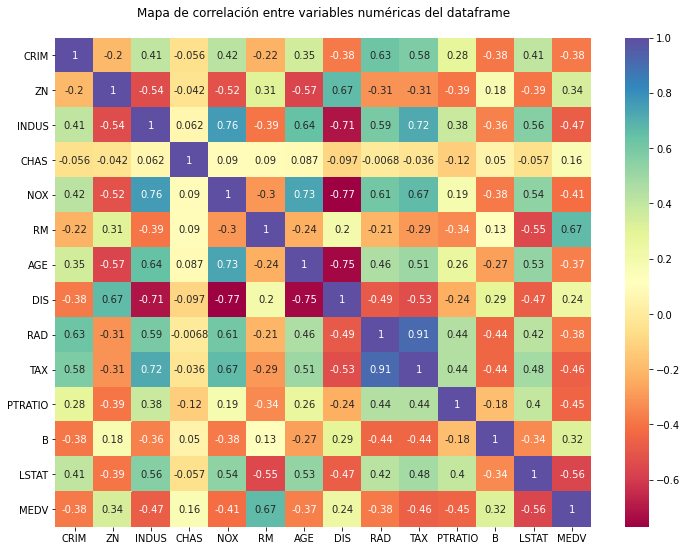

In [ ]:
## Relación entre las variables numéricas
## Factor de correlación estima la relación/asosiación entre variables
## +1 : alta relación (directamente proporcional)
## 0 : no relación alguna
## -1 : alta relación (inversamente proporcional)

## Se grafica con un mapa de calor
correlacion = dfvalor.corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlacion, annot=True, cmap='Spectral')
plt.title('Mapa de correlación entre variables numéricas del dataframe\n')
plt.show()


Se aprecia del gráfico de correlación anterior, que la variable dependiente $MEDV$ (valor mediano de las casas ocupadas por el propietario) presenta relaciones leves directa o indirectamente proporcional con las independientes; sin embargo, de una fuerte correlación directamente proporcional entre la variable independiente $TAX$ y $RAD$, como una correlación inversamente proporcional DIS (distancias a 5 centros de empleo) con $INDUS$ (proporción de acres de negocios no minoristas), $NOX$ (concentración de óxido) y $AGE$ (proporción de unidades construidas antes de 1940).

# **DISTRIBUCIÓN DE LA VARIABLE $target$ (distribución logarítmica)**

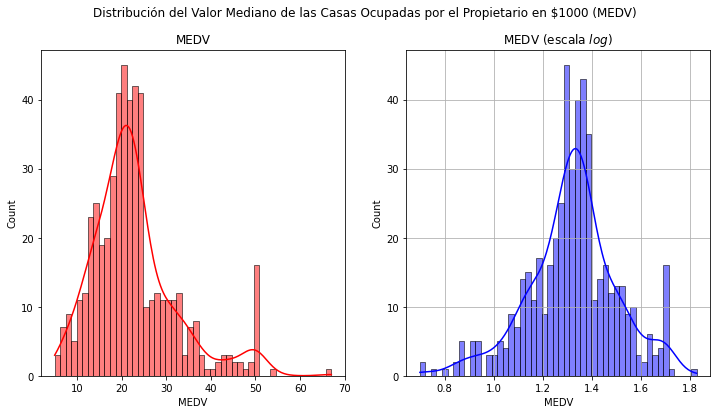

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Distribución del Valor Mediano de las Casas Ocupadas por el Propietario en $1000 (MEDV)')

sns.histplot(data=dfvalor['MEDV'], bins=50, color='r', kde=True, ax = axes[0])
axes[0].set_title('MEDV')

sns.histplot(np.log10(dfvalor['MEDV']), bins=50, color='b', kde=True, ax = axes[1])
axes[1].set_title('MEDV (escala $log$)')

plt.grid()
plt.show()


El gráfico rojo, los valores varían desde 5 hasta casi los 70, el gráfico sesgado hacia la derecha. En el gráfico logarítmico (Azul) el gráfico tiende a ser normal


#### Además es posible observar el comportamiento de la variable dependiente MEDV en la distribución con algunas variables independientes como LSTAT, RAD e INDUS:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


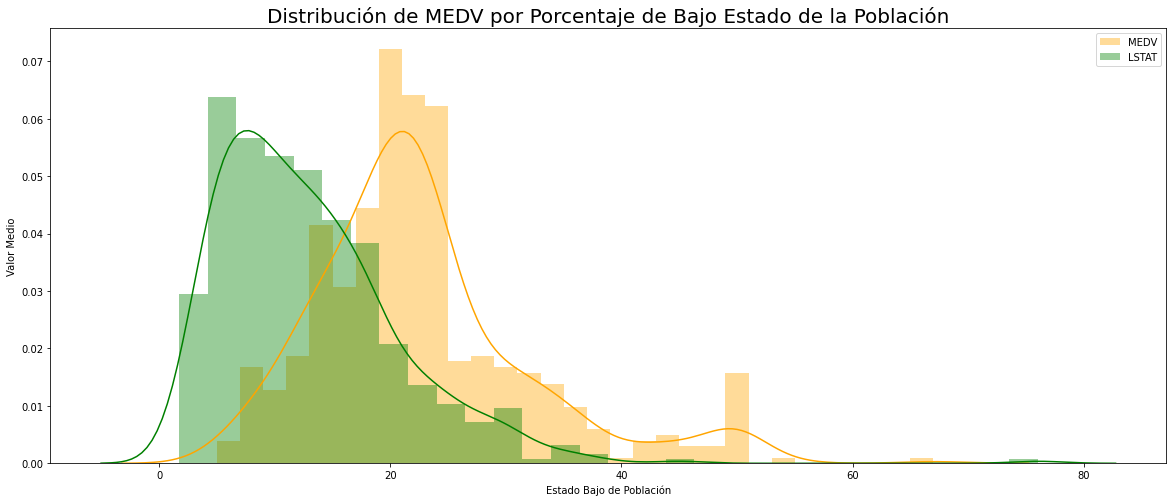

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.distplot(dfvalor['MEDV'], color='orange',label="MEDV", kde=True) 
sns.distplot(dfvalor['LSTAT'], color='green',label="LSTAT", kde=True) 
plt.title('Distribución de MEDV por Porcentaje de Bajo Estado de la Población', fontsize=20)
plt.ylabel('Valor Medio')
plt.xlabel('Estado Bajo de Población')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


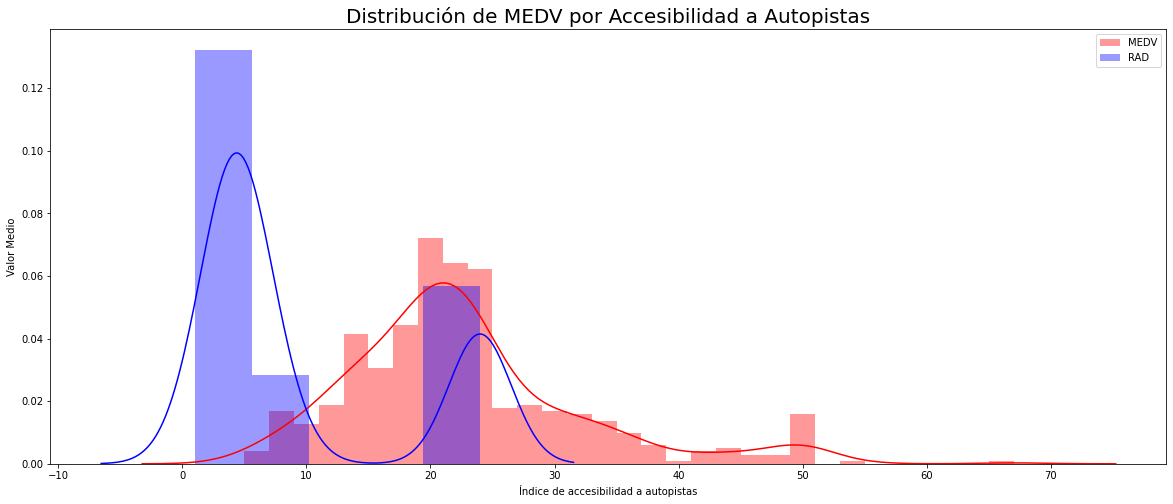

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.distplot(dfvalor['MEDV'], color='red',label="MEDV", kde=True) 
sns.distplot(dfvalor['RAD'], color='blue',label="RAD", kde=True) 
plt.title('Distribución de MEDV por Accesibilidad a Autopistas', fontsize=20)
plt.ylabel('Valor Medio')
plt.xlabel('Índice de accesibilidad a autopistas')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


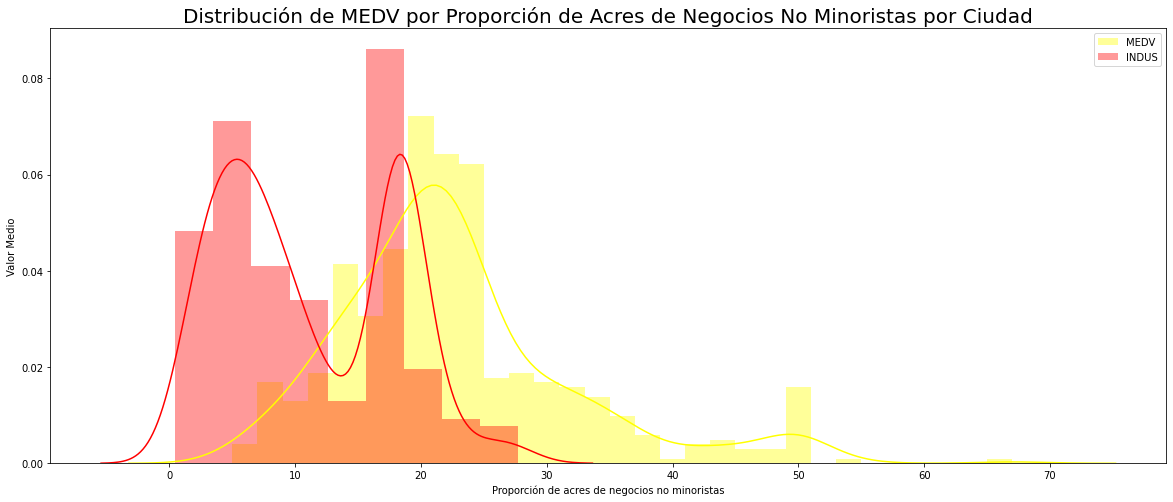

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.distplot(dfvalor['MEDV'], color='yellow',label="MEDV", kde=True) 
sns.distplot(dfvalor['INDUS'], color='red',label="INDUS", kde=True) 
plt.title('Distribución de MEDV por Proporción de Acres de Negocios No Minoristas por Ciudad', fontsize=20)
plt.ylabel('Valor Medio')
plt.xlabel('Proporción de acres de negocios no minoristas')
plt.legend()
plt.show()

## **División de los datos**

Se requiere un conjunto de datos para el entrenamiento, y un conjunto de datos para hacer las pruebas correspondientes, y ver la precisión y todas las métricas de rendimiento del modelo

In [ ]:
from sklearn.model_selection import train_test_split

### X: son las variables independientes
### CRIM, ZN, INDUS, CHAS, NOX,RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
X = dfvalor.drop('MEDV', axis=1)
### y: es la variable dependiente
### 'MEDV'
y = dfvalor['MEDV'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#**Construcción del Modelo**

La idea es usar la ecuación de regresión lineal *$\theta$* = $(X^TX)^{-1}X^Ty$. En el primer paso se tiene que añadir una característica $X_{0}=1$ al conjunto de datos originales.

In [ ]:
## Paso 1: agregar x_0=1 al dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)), X_test]

In [ ]:
## Construir el modelo
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T,X_train_0)), np.matmul(X_train_0.T, y_train))

## Parámetros
parametros = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columnas = ['intersect:x_0=1'] + list(X.columns.values)
## Estos valores a un dataframe para que sean mejor visualizados
df_parametros = pd.DataFrame({'Parametros': parametros, 'Columns': columnas, 'Theta': theta})

In [ ]:
df_parametros

,Parametros,Columns,Theta
0,theta_0,intersect:x_0=1,7.002130
1,theta_1,CRIM,-0.170852
2,theta_2,ZN,0.045503
3,theta_3,INDUS,-0.003136
4,theta_4,CHAS,2.569058
5,theta_5,NOX,-13.579000
6,theta_6,RM,6.701991
7,theta_7,AGE,-0.054708
8,theta_8,DIS,-1.602678
9,theta_9,RAD,0.191540


# Se requiere comparar los parámetros con el modelo dado por Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_lrsK = LinearRegression()
## para sklearn no se necesita agregar el valor x0=1 para theta0
modelo_lrsK.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## Parámetros de SKLEARN
thetaSK = [modelo_lrsK.intercept_] + list(modelo_lrsK.coef_)

## Estos valores a un dataframe para que sean mejor visualizados
df_parametros = df_parametros.join(pd.Series(thetaSK, name='Valores SK theta'))
df_parametros

,Parametros,Columns,Theta,Valores SK theta
0,theta_0,intersect:x_0=1,7.002130,7.002130
1,theta_1,CRIM,-0.170852,-0.170852
2,theta_2,ZN,0.045503,0.045503
3,theta_3,INDUS,-0.003136,-0.003136
4,theta_4,CHAS,2.569058,2.569058
5,theta_5,NOX,-13.579000,-13.579000
6,theta_6,RM,6.701991,6.701991
7,theta_7,AGE,-0.054708,-0.054708
8,theta_8,DIS,-1.602678,-1.602678
9,theta_9,RAD,0.191540,0.191540


Los parámetros obtenidos en ambos modelos son significativamente iguales. En otras palabras, el modelo construido es un éxito, dado que modela la ecuación normal y es verificado por el implementado en **Scikit-Learn** 

# **Evaluación del modelo**

Se realiza la predicción del valor de la variable objetivos utilizando los parámetros de nuestro modelo, en el conjunto de prubeas **(X_test, y_test)**. A continuación, se compara el valor real con el valor predicho. Se calcula el Error Cuadrático Medio (MAE):

$R^2$: es la medida estadística de la proximidad de los datos a la linea de regresión ajustada. Siempre estará entre 0 y 1 (0 y 100%). El valor 0 indica que el modelo no explica la variabilidad de los datos de respuesta en torno a su media. El 100% indica que el modelo explica *toda* la variabilidad de los datos de respuesta en torno a la media.  

\begin{gather}
R^2 = 1 - \frac{SSE}{SST}
\end{gather}

\begin{gather}
SSE = \sum_{i=1}^{m}(\hat{y}_i-y_i)^2
\end{gather}

\begin{gather}
SST = \sum_{i=1}^{m}(y_i-\bar y_i)^2
\end{gather}

Nota: $\hat{y}$ valor predicho, $\bar {y}$ valor medio de y


In [ ]:
## Ecuación normal
y_pred_norm = np.matmul(X_test_0, theta)

In [ ]:
## Evaluación: MSE
### Aquí m es la cantidad de observaciones en el conjunto de pruebas 
J_mse = np.sum((y_pred_norm - y_test)**2)/X_test_0.shape[0]

In [ ]:
## R_cuadradas:
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_cuadrado = 1 - (sse/sst)

print('El Error Cuadrático Medio (Mean Squear Error MSE) o Jtheta es: ', J_mse)
print('R cuadrado obtenido por el método de la ecuación normal es: ', R_cuadrado)

El Error Cuadrático Medio (Mean Squear Error MSE) o Jtheta es:  22.172601641028397
R cuadrado obtenido por el método de la ecuación normal es:  0.673922034266144


In [ ]:
## Se requiere comparar con las métricas dadas por Scikit-learn
from sklearn.metrics import mean_absolute_error, r2_score

### El modelo de sklearn hacer las predicciones en el conjunto
y_pred_sk = modelo_lrsK.predict(X_test)

In [ ]:
### Evaluación MSE
J_mse_sk = mean_absolute_error(y_test, y_pred_sk)
### Evaluación
R_cuadrado_sk = modelo_lrsK.score(X_test, y_test)
R_cuadrado_skII = r2_score(y_test,y_pred_sk)
print('El Error Cuadrático Medio (Mean Squear Error MSE) por  SK: ', J_mse_sk)
print('R cuadrado obtenido por el método  score de sklearn es: ', R_cuadrado_sk)
print('R cuadrado obtenido por la métrica directa es: ', R_cuadrado_skII)


El Error Cuadrático Medio (Mean Squear Error MSE) por  SK:  3.3369294051571345
R cuadrado obtenido por el método  score de sklearn es:  0.6739220342661698
R cuadrado obtenido por la métrica directa es:  0.6739220342661698


El error cuadrático medio por SK demuestra ser moderado, aún cuando este no concuerda con el MSE dado por el modelo. Ahora bien, $R^2$ sí concordó con el modelo y los dos métodos de SK con un porcentaje de 67.39%, lo que interpreta la variabilidad del 67.39% de las variables independientes.

# **Validación del modelo**

Para hacer la validación del modelo tenemos que comprobar algunos supuestos del *modelo de regresión lineal*. Los supuestos más comunes del modelo de regresión lineal:

1.   Relación lineal: La relación entre la variable dependiente y la independiente debe ser lineal. Se puede comprobar mediante un gráfico de dispersión del valor real frente al valor predicho.
2.   El valor del error cuadrático medio (MAE), debe ser 0 o muy cercano a cero.
3.   El gráfico de error residual debe tener una distribución normal.
4.   La regresión lineal requiere que todas la variables se presenten normalmente distribuidas. Se puede comprbar con el gráfico Q-Q (cuartil cuartil).
5.    La regresión asume que hay poca o ninguna multicolinealidad en los datos. La multicolinealidad se produce cuando las variables independientes tienen un alto factor de correlación (el factor de correlación *Spearman*). El factor de inflación de la varianza **VIF** identifica la correlación entre las variables independientes y la fuerza de correlación.

\begin{gather}
VIF = \frac{1}{1-R^2}
\end{gather} 
Si **VIF** se encuentra alrededor de 1, se presenta una correlación satisfactoria. Si **VIF**> 1 y **VIF**< 5, se presenta una correlación moderada. Si **VIF** > 10, nivel de multicolinealidad es crítico.
6.    Homocedasticidad: Los datos son homocedásticos, es decir que los residuos son iguales en la linea de regresión lineal. Se puede observar en el gráfico de dispersión de los residuos frente al valor ajustado. Al no presentar la Homocedaticidad, se puede presentar un patrón como embudo, se dirá que los datos son heteroscedásticos.



###1.-   Relación lineal: La relación entre la variable dependiente y la independiente debe ser lineal. Se puede comprobar mediante un gráfico de dispersión del valor real frente al valor predicho.

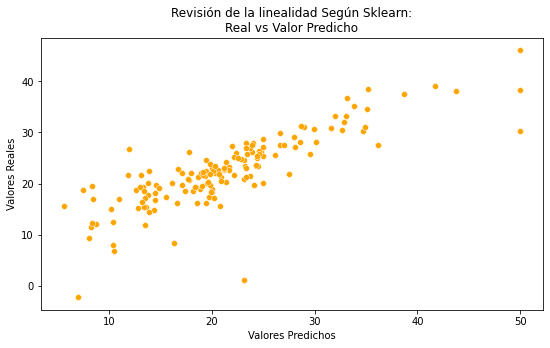

In [ ]:
### Se requiere chequear la relación lineal (linealidad) según Sklearn
plt.figure(figsize=(9,5))
sns.scatterplot(x=y_test, y=y_pred_sk, color ="orange")
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.title('Revisión de la linealidad Según Sklearn:\nReal vs Valor Predicho')
plt.show()

###2.-   El valor del error cuadrático medio (MAE), debe ser 0 o muy cercano a cero.

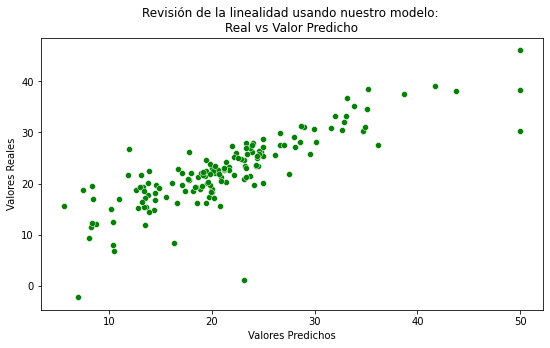

In [ ]:
### Se requiere chequear la relación lineal (linealidad) según nuestro modelo implementado
plt.figure(figsize=(9,5))
sns.scatterplot(x=y_test, y=y_pred_norm, color ='g')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.title('Revisión de la linealidad usando nuestro modelo: \nReal vs Valor Predicho')
plt.show()

###3.-   El gráfico de error residual debe tener una distribución normal.

<Figure size 648x432 with 0 Axes>

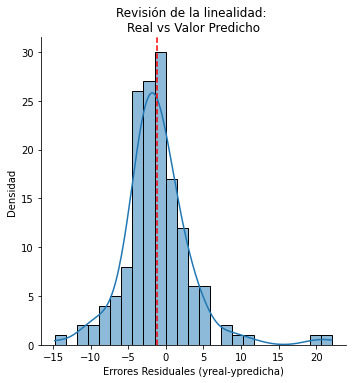

In [ ]:
### Revisión de los residuos: normal y promedio
plt.figure(figsize=(9,6))
sns.displot((y_test - y_pred_sk),kde=True)
plt.axvline((y_test - y_pred_sk).mean(), color='r',linestyle='--')
plt.ylabel('Densidad')
plt.xlabel('Errores Residuales (yreal-ypredicha)')
plt.title('Revisión de la linealidad: \nReal vs Valor Predicho')
plt.show()

###4.-   La regresión lineal requiere que todas la variables se presenten normalmente distribuidas. Se puede comprbar con el gráfico Q-Q (cuartil cuartil).

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


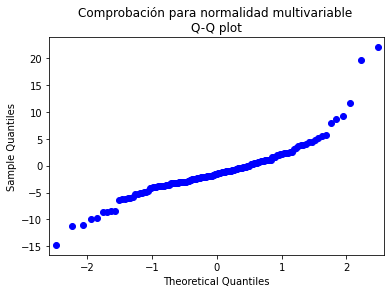

In [ ]:
### Se espera que sea una linea recta en el gráfico Q-Q
import statsmodels.api as sm

sm.qqplot((y_test-y_pred_sk))
plt.title('Comprobación para normalidad multivariable \nQ-Q plot')
plt.show()

###5.-    La regresión asume que hay poca o ninguna multicolinealidad en los datos. 

In [ ]:
#Si **VIF** se encuentra alrededor de 1, se presenta una correlación satisfactoria. 
#Si **VIF**> 1 y **VIF**< 5, se presenta una correlación moderada. 
#Si **VIF** > 10, nivel de multicolinealidad es crítico

VIF = 1/(1-R_cuadrado)
print('El factor de Varianza Inflada es:', VIF)

El factor de Varianza Inflada es: 3.0667512223631745


El VIF presenta una correlación moderada

###6.-    Homocedasticidad

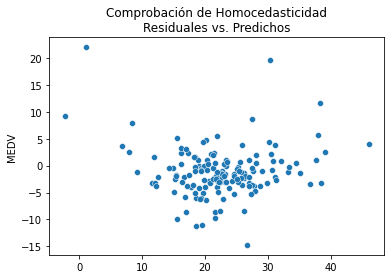

In [ ]:
sns.scatterplot(x=y_pred_sk, y=(y_test-y_pred_sk))
plt.title("Comprobación de Homocedasticidad\nResiduales vs. Predichos")
plt.show()

## La suposición del modelo de regresión lineal es:

1.- El gráfico presenta que los valores reales, frente a los predichos representa una curva con detalles, por lo que la suposición lineal **falla**.

2.- La media residual es cercana a cero, el gráfico del error residual es sesgado a la derecha.

3.- El gráfico Q-Q presenta que el valor logarítmico mayor $\approx$ 1.5 tiende a aumentar.

4.- El valor VF es inferior a 5, por lo que se infiere que no hay multicolinealidad.

5.- En el gráfico de Homocedasticidad se presenta como un embudo, por lo que se presenta un gráfico heterocedástico, en donde el error disminuirá después de cierto punto.

In [ ]:
Xsm = dfvalor.drop('MEDV', axis=1)
##### y: es la variable dependiente
##### 'MEDV'
ysm = dfvalor['MEDV']

In [ ]:
ysm.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
Xsm = sm.add_constant(Xsm)
model = sm.OLS(ysm, Xsm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     63.57
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.01e-96
Time:                        12:37:02   Log-Likelihood:                -1608.3
No. Observations:                 506   AIC:                             3245.
Df Residuals:                     492   BIC:                             3304.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3584      6.056      2.866      0.0

## **Curvas de Aprendizaje**

Determina el entrenamiento con validación cruzada y las puntuaciones de las pruebas para diferentes tamaños de conjunto de entrenamiento.

Un generador de validación cruzada divide todo el conjunto de datos k veces en los datos de entrenamiento y prueba. Los subconjuntos del conjunto de entrenamiento con diferentes tamaños se utilizarán para entrenar al estimador y se calculará una puntuación para cada tamaño de subconjunto de entrenamiento y el conjunto de pruebas. Después, las puntuaciones se promediarán en todas las carreras k para cada tamaño de subconjunto de entrenamiento.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=modelo_lrsK,
                        X=X_train, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

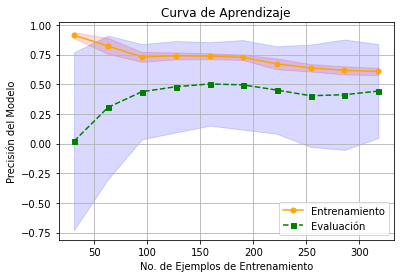

In [ ]:
plt.plot(train_sizes, train_mean, color='orange', marker='o', markersize=5,
         label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='g', linestyle='--', 
         marker='s', markersize=5, label='Evaluación')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de Aprendizaje')
plt.xlabel('No. de Ejemplos de Entrenamiento')
plt.ylabel('Precisión del Modelo')
plt.legend(loc='lower right')
plt.show()

## **Conclusiones**

El modelo planteado muestra una correlación moderada lo que es aceptable en la regresión lineal, sustentada por el error cuadrático y la curva de aprendizaje, que logra estabilizarse al tener casi 200 muestras. Sin embargo, muchas de las gráficas para evaluar el modelo no se mostraron muy concluyentes y es precisamente la curva de aprendizaje quien demuestra un fuerte sesgo en el modelo, además se obtuvo un porcentaje en *R2* cercano a 70% que puede demostrar cierta efectividad aún cuando la precisión tienda a 0.5; sin ignorar el hecho de que la predicción puede ser muy variable, el modelo no se va a comportar tan adaptable y preciso como se esperaría.

Otro aspecto a tener en cuenta es la falta de variables categóricas, esto en un principio suponía una mayor precisión y facilidad en el manejo de la información, pero fue una de las carentes que dificultó el análisis al relacionar dos variables con una correlación considerable. De ahí que la cantidad de variables numéricas llegó en algunos casos en destacar a unas variables como poco influyentes en el modelo.

En definitiva, para realizar un modelo conciso de predicción por regresión lineal es necesario tener un análisis de toda la información, concluyendo la importancia de cada variable y de ese modo, lograr ajustar el dataframe para reducir el sesgo y aumentar la precisión del modelo.

## **Referencias**

Ali, A. (2020). Real Estate Dataset. https://www.kaggle.com/arslanali4343/real-estate-dataset

Scikit Learn (2020). sklearn.linear_model.LinearRegression. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Scikit Learn (2020). sklearn.model_selection.learning_curve .https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

Sitio Big Data. (2018). Aprendizaje automatico y las Metricas de regresión.https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/

López, R. (2016). Machine Learning con Python - Sobreajuste. https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/